### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Loading and Initial Data Exploration

In [3]:
data1 = pd.read_csv('Salesdata.csv', low_memory=False)
data2 = pd.read_csv('store.csv')

1. __Data_1__

In [4]:
data1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [4]:
rows,col=data1.shape
print(f'rows= {rows} and column={col}')

rows= 1017209 and column=9


#### Data_1 Informations

1. __Id__ - an Id that represents a (Store, Date) duple within the set
2. __Store__ - a unique Id for each store
3. __Sales__ - the turnover for any given day (Dependent Variable)
4. __Customers__ - the number of customers on a given day
5.  __Open__ - an indicator for whether the store was open: 0 = closed, 1 = open
6.  __Promo__ - indicates whether a store is running a promo on that day
7.  __State Holiday__ - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
8. __School Holiday__ - indicates if the (Store) was affected by the closure of public schools

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [7]:
data1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
data1.duplicated().sum()

0

2. __Data_2__

In [9]:
data2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
rows,col=data2.shape
print(f'rows= {rows} and column={col}')

rows= 1115 and column=10


#### Data(2) Informations

1. __Store__ - a unique Id for each store
2. __Store Type__ - differentiates between 4 different store models: a, b, c, d
3. __Assortment__ - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
4. __Competition Distance__ – the distance in meters to the nearest competitor store
5. __Competition Open Since[Month/Year]__ - gives the approximate year and month of the time the nearest competitor was opened
6. __Promo2__ - Promo2 is a continuing and consecutive promotion for some stores: 0
= store is not participating, 1 = store is participatin
7. __Promo2  Since[Year/Week]__ - describes the year and calendar week when the store started participating in Promo2
8. __Promo Interval__ - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, and November of any given year for that store.


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
for column in data2.columns:
    if data2[column].dtype == object:
        print(f"Unique values in {column}:")
        print(data2[column].unique())
        print('-' * 40)

Unique values in StoreType:
['c' 'a' 'd' 'b']
----------------------------------------
Unique values in Assortment:
['a' 'c' 'b']
----------------------------------------
Unique values in PromoInterval:
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
----------------------------------------


In [13]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [14]:
data2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

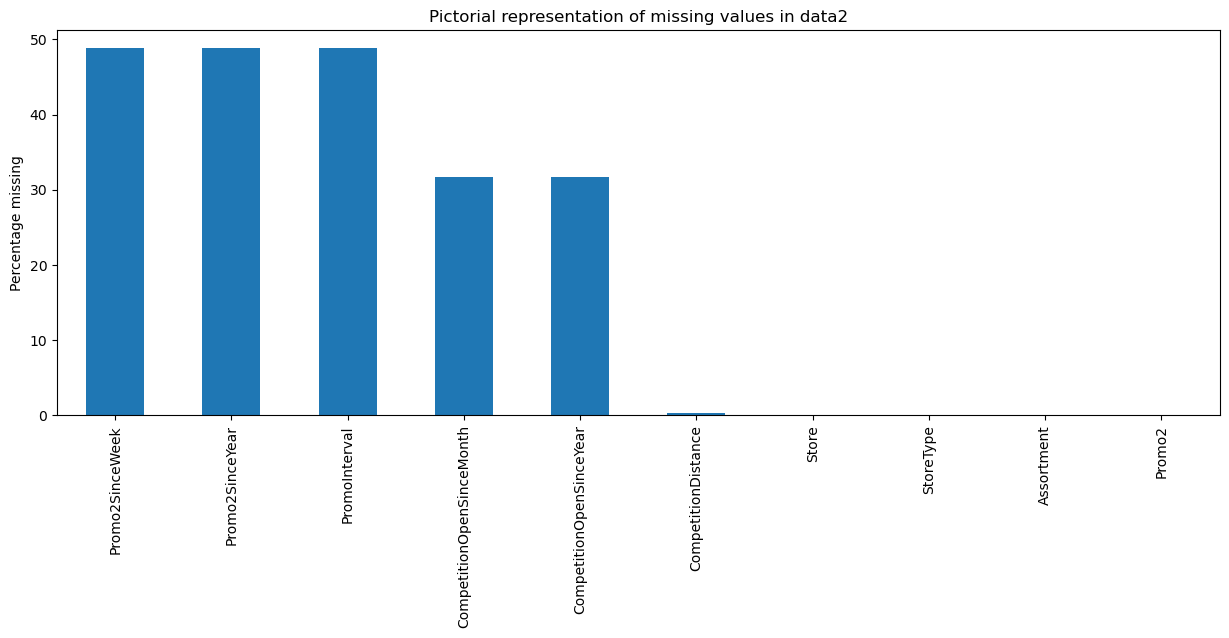

In [65]:
missing_percentage = data2.isna().mean() * 100
plt.figure(figsize=(15, 5))
missing_percentage.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Percentage missing")
plt.title("Pictorial representation of missing values in data2")
plt.show()

In [66]:
data2.duplicated().sum()

0

### Data Preprocessing

- __Handling Missing Values__

1. __For CompetitionDistance__

In [67]:
data2['CompetitionDistance']

0        1270.0
1         570.0
2       14130.0
3         620.0
4       29910.0
         ...   
1110     1900.0
1111     1880.0
1112     9260.0
1113      870.0
1114     5350.0
Name: CompetitionDistance, Length: 1115, dtype: float64

In [68]:
data2['CompetitionDistance'][data2['CompetitionDistance'].isna()]

290   NaN
621   NaN
878   NaN
Name: CompetitionDistance, dtype: float64

In [4]:
data2['CompetitionDistance'] = data2['CompetitionDistance'].fillna(data2['CompetitionDistance'].median())

In [5]:
data2['CompetitionDistance'].isna().sum()

0

2. __For CompetitionOpenSinceMonth and CompetitionOpenSinceYear__

In [71]:
data2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']]

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,9.0,2008.0
1,11.0,2007.0
2,12.0,2006.0
3,9.0,2009.0
4,4.0,2015.0
...,...,...
1110,6.0,2014.0
1111,4.0,2006.0
1112,NaN,NaN
1113,NaN,NaN


In [72]:
data2['CompetitionOpenSinceMonth'][data2['CompetitionOpenSinceMonth'].isna()],data2['CompetitionOpenSinceYear'][data2['CompetitionOpenSinceYear'].isna()]

(11     NaN
 12     NaN
 15     NaN
 18     NaN
 21     NaN
         ..
 1095   NaN
 1099   NaN
 1112   NaN
 1113   NaN
 1114   NaN
 Name: CompetitionOpenSinceMonth, Length: 354, dtype: float64,
 11     NaN
 12     NaN
 15     NaN
 18     NaN
 21     NaN
         ..
 1095   NaN
 1099   NaN
 1112   NaN
 1113   NaN
 1114   NaN
 Name: CompetitionOpenSinceYear, Length: 354, dtype: float64)

In [6]:
data2['CompetitionOpenSinceMonth'] = data2['CompetitionOpenSinceMonth'].fillna(data2['CompetitionOpenSinceMonth'].mode()[0])
data2['CompetitionOpenSinceYear'] = data2['CompetitionOpenSinceYear'].fillna(data2['CompetitionOpenSinceYear'].mode()[0])

In [6]:
data2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].isna().sum()

CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
dtype: int64

3. __For Promo2SinceWeek,Promo2SinceYear and PromoInterval__

In [22]:
data2[['Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']]

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
1,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
...,...,...,...,...
1110,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,0,NaN,NaN,NaN
1112,0,NaN,NaN,NaN
1113,0,NaN,NaN,NaN


In [7]:
data2['Promo2SinceWeek']=data2['Promo2SinceWeek'].fillna(value=0)
data2['Promo2SinceYear']=data2['Promo2SinceYear'].fillna(value=0)
data2['PromoInterval']=data2['PromoInterval'].fillna(value=0)

In [9]:
data2.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

- __Correcting the datatype__

In [8]:
data1["Date"] = pd.to_datetime(data1["Date"], format="%d-%m-%Y")

- __Merging Data1 and Data2__

In [9]:
df = data1.merge(data2, on='Store', how='left')

In [10]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [47]:
df.shape

(1017209, 18)

- __Extract additional date features__

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear

In [12]:
df[['Year','Month','WeekOfYear','DayOfYear']]

,Year,Month,WeekOfYear,DayOfYear
0,2015,7,31,212
1,2015,7,31,212
2,2015,7,31,212
3,2015,7,31,212
4,2015,7,31,212
...,...,...,...,...
1017204,2013,1,1,1
1017205,2013,1,1,1
1017206,2013,1,1,1
1017207,2013,1,1,1


- __Encoding categorical variables__

In [50]:
# Print unique values for each object datatype columns in df
for column in df.columns:
    if df[column].dtype == object:
        print(f"Unique values in {column}:")
        print(df[column].unique())
        print('-' * 40)

Unique values in StateHoliday:
['0' 'a' 'b' 'c']
----------------------------------------
Unique values in StoreType:
['c' 'a' 'd' 'b']
----------------------------------------
Unique values in Assortment:
['a' 'c' 'b']
----------------------------------------
Unique values in PromoInterval:
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
----------------------------------------


1. __StateHoliday__

##### Since 0 indicates that there was no holiday and a,b,c indicate different holidays like Christmas, public holiday, and easter holiday
##### so we will treat __no holiday as 0__ and __Holiday irrespective of what type of holiday it was as 1__

In [51]:
df['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [13]:
df['StateHoliday'] = df['StateHoliday'].replace({'a': 1, 'b': 1, 'c': 1}).astype(int)

In [32]:
df['StateHoliday'].value_counts()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64

2. __StoreType and Assortment__

In [54]:
df['StoreType'].value_counts(),df['Assortment'].value_counts()

(StoreType
 a    551627
 d    312912
 c    136840
 b     15830
 Name: count, dtype: int64,
 Assortment
 a    537445
 c    471470
 b      8294
 Name: count, dtype: int64)

In [14]:
le= LabelEncoder()

In [15]:
df['StoreType']=le.fit_transform(df['StoreType'])
df['Assortment']=le.fit_transform(df['Assortment'])

In [16]:
df['StoreType'].value_counts(),df['Assortment'].value_counts()

(StoreType
 0    551627
 3    312912
 2    136840
 1     15830
 Name: count, dtype: int64,
 Assortment
 0    537445
 2    471470
 1      8294
 Name: count, dtype: int64)

### Feature Engineering

3. __PromoInterval__

In [58]:
df['PromoInterval'].value_counts()

PromoInterval
0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64

In [59]:
df[['Store','Month','PromoInterval','Promo2']]

,Store,Month,PromoInterval,Promo2
0,1,7,0,0
1,2,7,"Jan,Apr,Jul,Oct",1
2,3,7,"Jan,Apr,Jul,Oct",1
3,4,7,0,0
4,5,7,0,0
...,...,...,...,...
1017204,1111,1,"Jan,Apr,Jul,Oct",1
1017205,1112,1,0,0
1017206,1113,1,0,0
1017207,1114,1,0,0


In [17]:
def promo2_running(df):
    month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = df['PromoInterval'].split(',')
        if df['Month'] and month_dict[df['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

df['Promo2Running'] = df.apply(promo2_running, axis=1) * df['Promo2']


1. __Store: 1__
2. Month: 7 (July)
3. PromoInterval: 0
4. Promo2: 0

##### Function Execution:

- months = df['PromoInterval'].split(',') -> months = ['0']
- df['Month'] -> 7, which maps to 'Jul' in month_dict.
- 'Jul' is not in ['0'], so the function returns 0.

##### Promo2Running Calculation:

0 * 0 = 0 (__Store 1 is not running promo2 in month of july__)




1. __Store: 2__
2. Month: 7 (July)
3. PromoInterval: 'Jan,Apr,Jul,Oct'
4. Promo2: 1

##### Function Execution:

- months = df['PromoInterval'].split(',') -> months = ['Jan', 'Apr', 'Jul', 'Oct']
- df['Month'] -> 7, which maps to 'Jul' in month_dict.'Jul' is in ['Jan', 'Apr', 'Jul', 'Oct'], so the function returns 1.

##### Promo2Running Calculation:

1 * 1 = 1  (__Store 2 is running promo2 in month of july__)


In [61]:
df[['Store','Month','PromoInterval','Promo2','Promo2Running']]

,Store,Month,PromoInterval,Promo2,Promo2Running
0,1,7,0,0,0
1,2,7,"Jan,Apr,Jul,Oct",1,1
2,3,7,"Jan,Apr,Jul,Oct",1,1
3,4,7,0,0,0
4,5,7,0,0,0
...,...,...,...,...,...
1017204,1111,1,"Jan,Apr,Jul,Oct",1,1
1017205,1112,1,0,0,0
1017206,1113,1,0,0,0
1017207,1114,1,0,0,0


In [18]:
df.drop('PromoInterval', axis=1, inplace=True)

In [22]:
df.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,WeekOfYear,DayOfYear,Promo2Running
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,9.0,2008.0,0,0.0,0.0,2015,7,31,212,0


In [64]:
df['Promo2Running'].value_counts()

Promo2Running
0    842417
1    174792
Name: count, dtype: int64

In [19]:
# calculate the number of months that a competitor has been open
df['CompetitionOpen'] = (df['Year'] - df['CompetitionOpenSinceYear'])*12 + (df['Month'] - df['CompetitionOpenSinceMonth'])
#correcting the negative values
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)

In [39]:
df[['Year','CompetitionOpenSinceYear','Month','CompetitionOpenSinceMonth','CompetitionOpen']]

,Year,CompetitionOpenSinceYear,Month,CompetitionOpenSinceMonth,CompetitionOpen
0,2015,2008.0,7,9.0,82.0
1,2015,2007.0,7,11.0,92.0
2,2015,2006.0,7,12.0,103.0
3,2015,2009.0,7,9.0,70.0
4,2015,2015.0,7,4.0,3.0
...,...,...,...,...,...
1017204,2013,2014.0,1,6.0,0.0
1017205,2013,2006.0,1,4.0,81.0
1017206,2013,2013.0,1,9.0,0.0
1017207,2013,2013.0,1,9.0,0.0


In [20]:
#dropping both the columns
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [21]:
#Calculate How Long Promo2 Has Been Running
#combining promo2 to total months
#assuming approximately 4.345 weeks per month, hence the factor 0.230137
df['Promo2Open'] = (df['Year'] - df['Promo2SinceYear'])*12 + (df['WeekOfYear'] - df['Promo2SinceWeek'])*0.230137

#correcting the negative values
df['Promo2Open'] = df['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df['Promo2']
df['Promo2Open'] = df['Promo2Open'].round()

In [42]:
df[['Year','Promo2SinceYear','WeekOfYear','Promo2SinceWeek','Promo2','Promo2Open']]

,Year,Promo2SinceYear,WeekOfYear,Promo2SinceWeek,Promo2,Promo2Open
0,2015,0.0,31,0.0,0,0.0
1,2015,2010.0,31,13.0,1,64.0
2,2015,2011.0,31,14.0,1,52.0
3,2015,0.0,31,0.0,0,0.0
4,2015,0.0,31,0.0,0,0.0
...,...,...,...,...,...,...
1017204,2013,2013.0,1,31.0,1,0.0
1017205,2013,0.0,1,0.0,0,0.0
1017206,2013,0.0,1,0.0,0,0.0
1017207,2013,0.0,1,0.0,0,0.0


In [22]:
#Dropping unnecessary columns
df.drop(['Promo2SinceYear','Promo2SinceWeek'],axis=1,inplace=True)

In [71]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,Promo2Running,CompetitionOpen,Promo2Open
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,0,2015,7,31,212,0,82.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570.0,1,2015,7,31,212,1,92.0,64.0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,1,2015,7,31,212,1,103.0,52.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,0,2015,7,31,212,0,70.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,0,2015,7,31,212,0,3.0,0.0


In [72]:
df.shape

(1017209, 20)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  int32         
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  int32         
 10  Assortment           1017209 non-null  int32         
 11  CompetitionDistance  1017209 non-null  float64       
 12  Promo2               1017209 non-null  int64         
 1

##### It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales.
##### Since the stores closed had 0 sale value; removing the irrelevant part

In [74]:
df['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

<Axes: xlabel='Open', ylabel='Sales'>

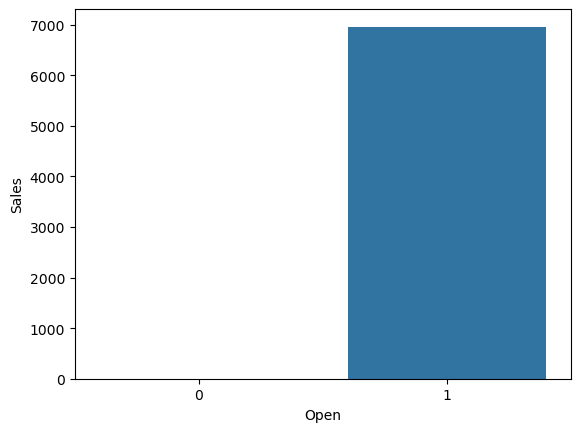

In [75]:
sns.barplot(df,x='Open',y='Sales')

In [76]:
df.loc[df['Open']==0]['Sales'].value_counts()

Sales
0    172817
Name: count, dtype: int64

In [77]:
df.shape

(1017209, 20)

In [23]:
df1 = df[df.Open!= 0]
df1=df1.drop('Open', axis=1)

In [79]:
df1.shape

(844392, 19)

In [80]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,Promo2Running,CompetitionOpen,Promo2Open
0,1,5,2015-07-31,5263,555,1,0,1,2,0,1270.0,0,2015,7,31,212,0,82.0,0.0
1,2,5,2015-07-31,6064,625,1,0,1,0,0,570.0,1,2015,7,31,212,1,92.0,64.0
2,3,5,2015-07-31,8314,821,1,0,1,0,0,14130.0,1,2015,7,31,212,1,103.0,52.0
3,4,5,2015-07-31,13995,1498,1,0,1,2,2,620.0,0,2015,7,31,212,0,70.0,0.0
4,5,5,2015-07-31,4822,559,1,0,1,0,0,29910.0,0,2015,7,31,212,0,3.0,0.0


In [81]:
df1.shape

(844392, 19)

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                844392 non-null  int64         
 1   DayOfWeek            844392 non-null  int64         
 2   Date                 844392 non-null  datetime64[ns]
 3   Sales                844392 non-null  int64         
 4   Customers            844392 non-null  int64         
 5   Promo                844392 non-null  int64         
 6   StateHoliday         844392 non-null  int32         
 7   SchoolHoliday        844392 non-null  int64         
 8   StoreType            844392 non-null  int32         
 9   Assortment           844392 non-null  int32         
 10  CompetitionDistance  844392 non-null  float64       
 11  Promo2               844392 non-null  int64         
 12  Year                 844392 non-null  int32         
 13  Month             

### Data Visualization

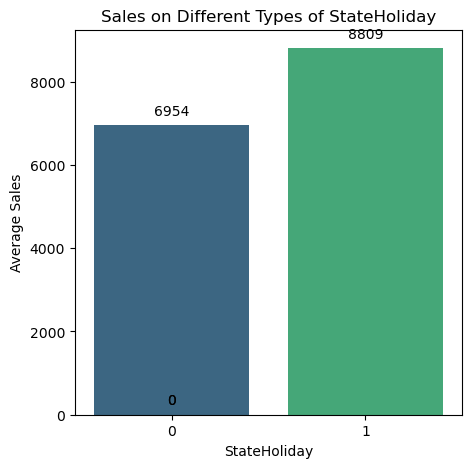

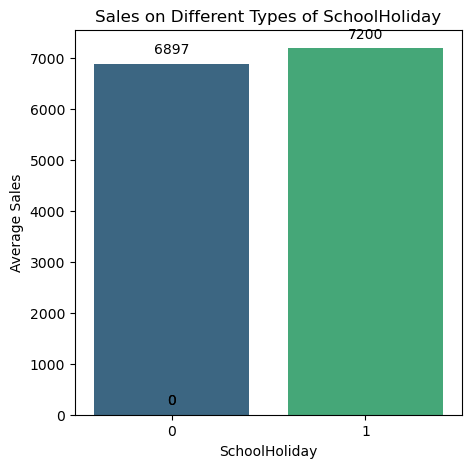

In [87]:
variables = ['StateHoliday', 'SchoolHoliday']

for variable in variables:
    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df1, x=variable, y='Sales', hue=variable, palette='viridis', errorbar=None)
    plt.title(f'Sales on Different Types of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Average Sales')
    
    # Add annotations (bar values) at the top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
    plt.legend().remove()  
    plt.show()

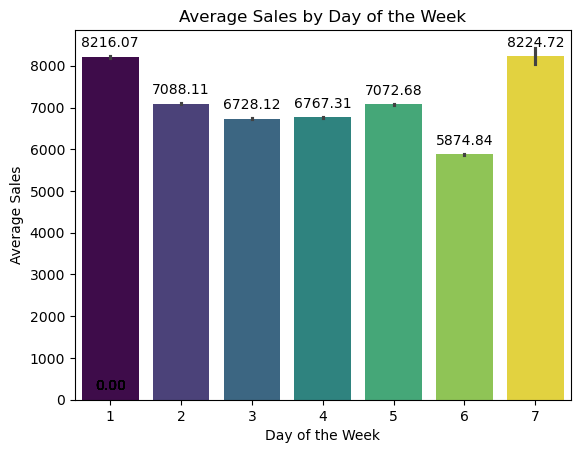

In [26]:
ax = sns.barplot(data=df1, x='DayOfWeek', y='Sales', hue='DayOfWeek', palette='viridis', dodge=False)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.legend().remove()  
plt.show()

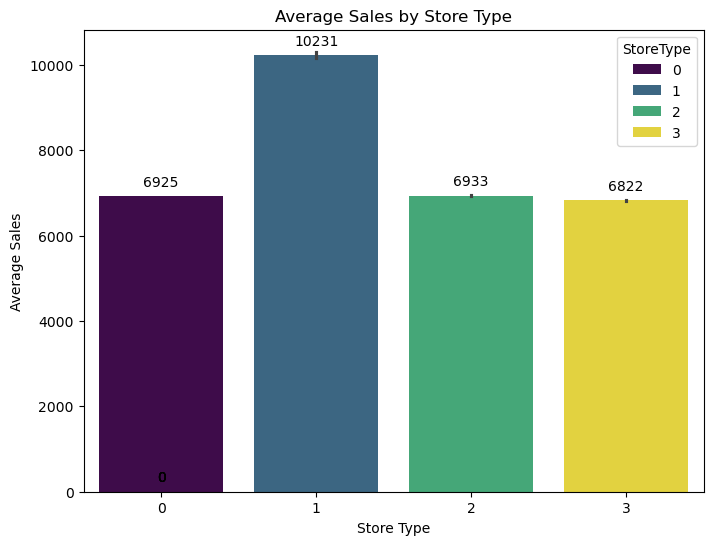

In [88]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df1, x='StoreType', y='Sales', hue='StoreType', palette='viridis', dodge=False)
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')

# Adding annotations (values at top of bars)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

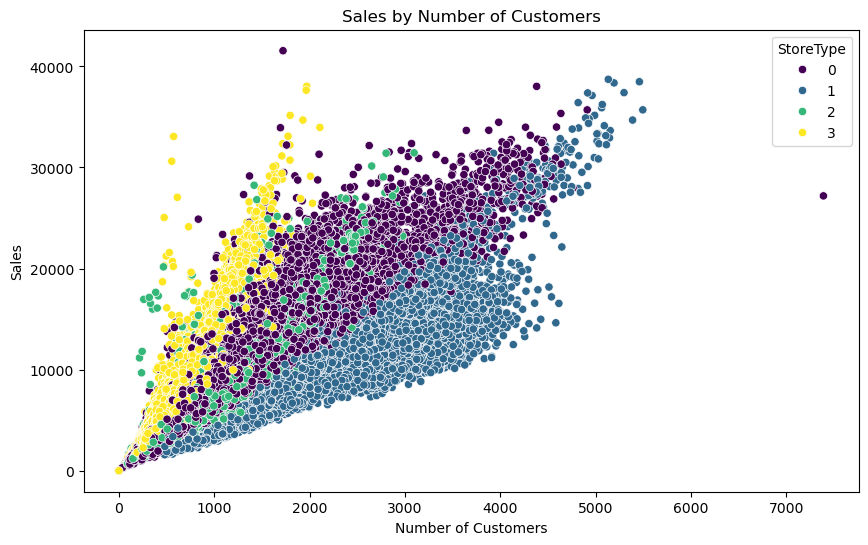

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Customers', y='Sales', hue='StoreType', palette='viridis')
plt.title('Sales by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

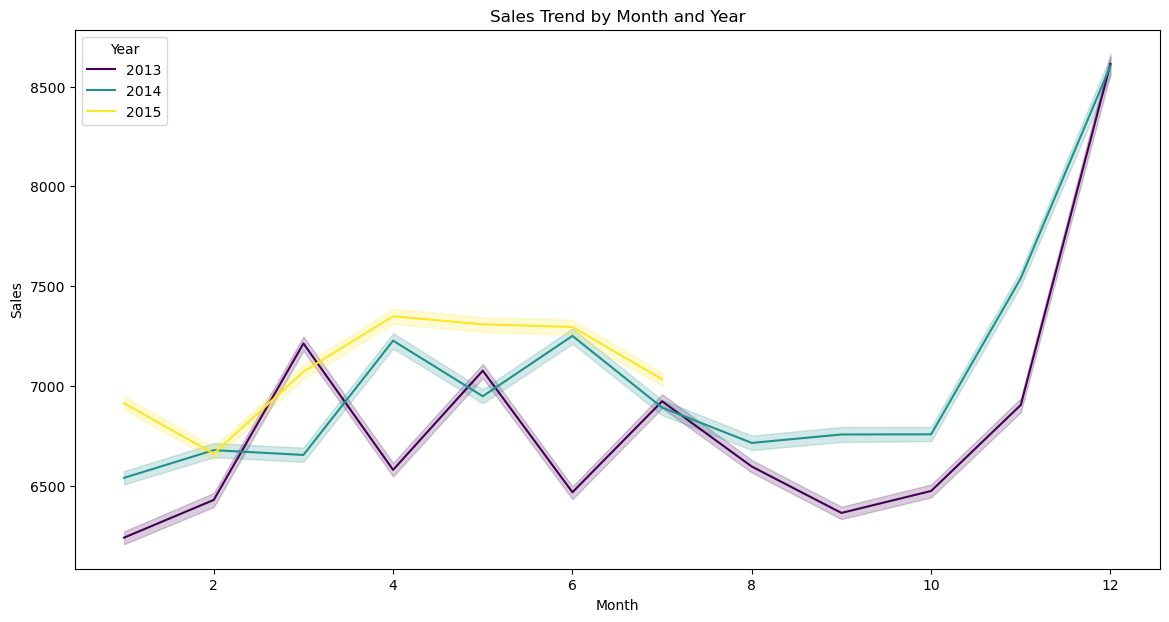

In [28]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df1, x='Month', y='Sales', hue='Year', palette='viridis')
plt.title('Sales Trend by Month and Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

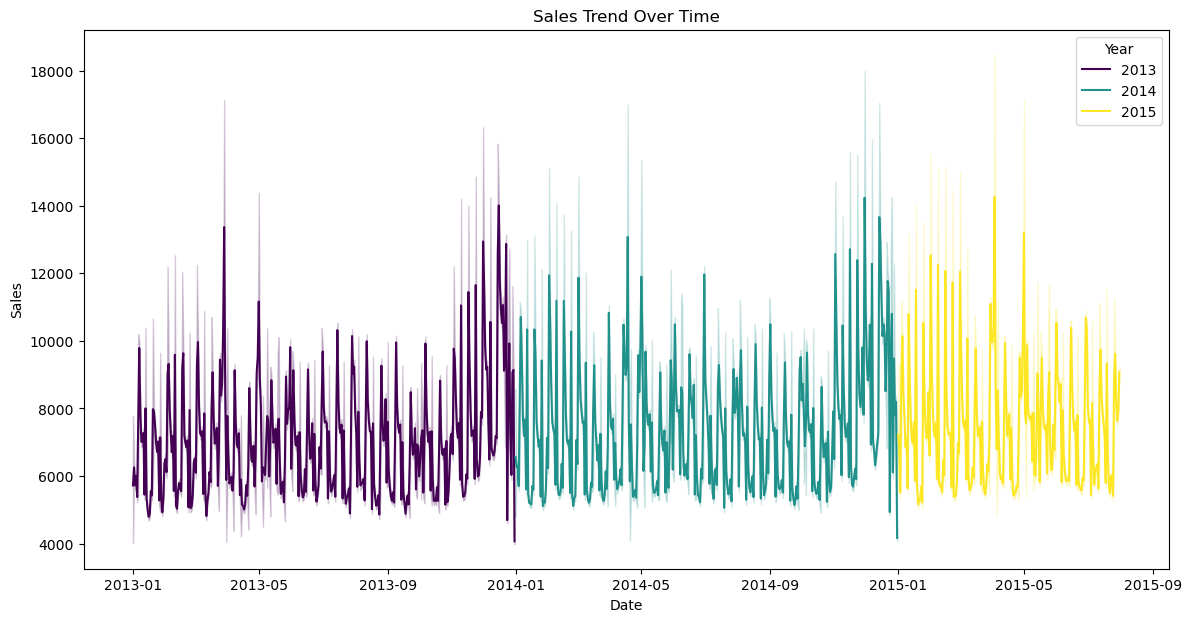

In [189]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df1, x='Date', y='Sales', hue='Year', palette='viridis')
plt.title('Sales Trend Over Time')
plt.show()

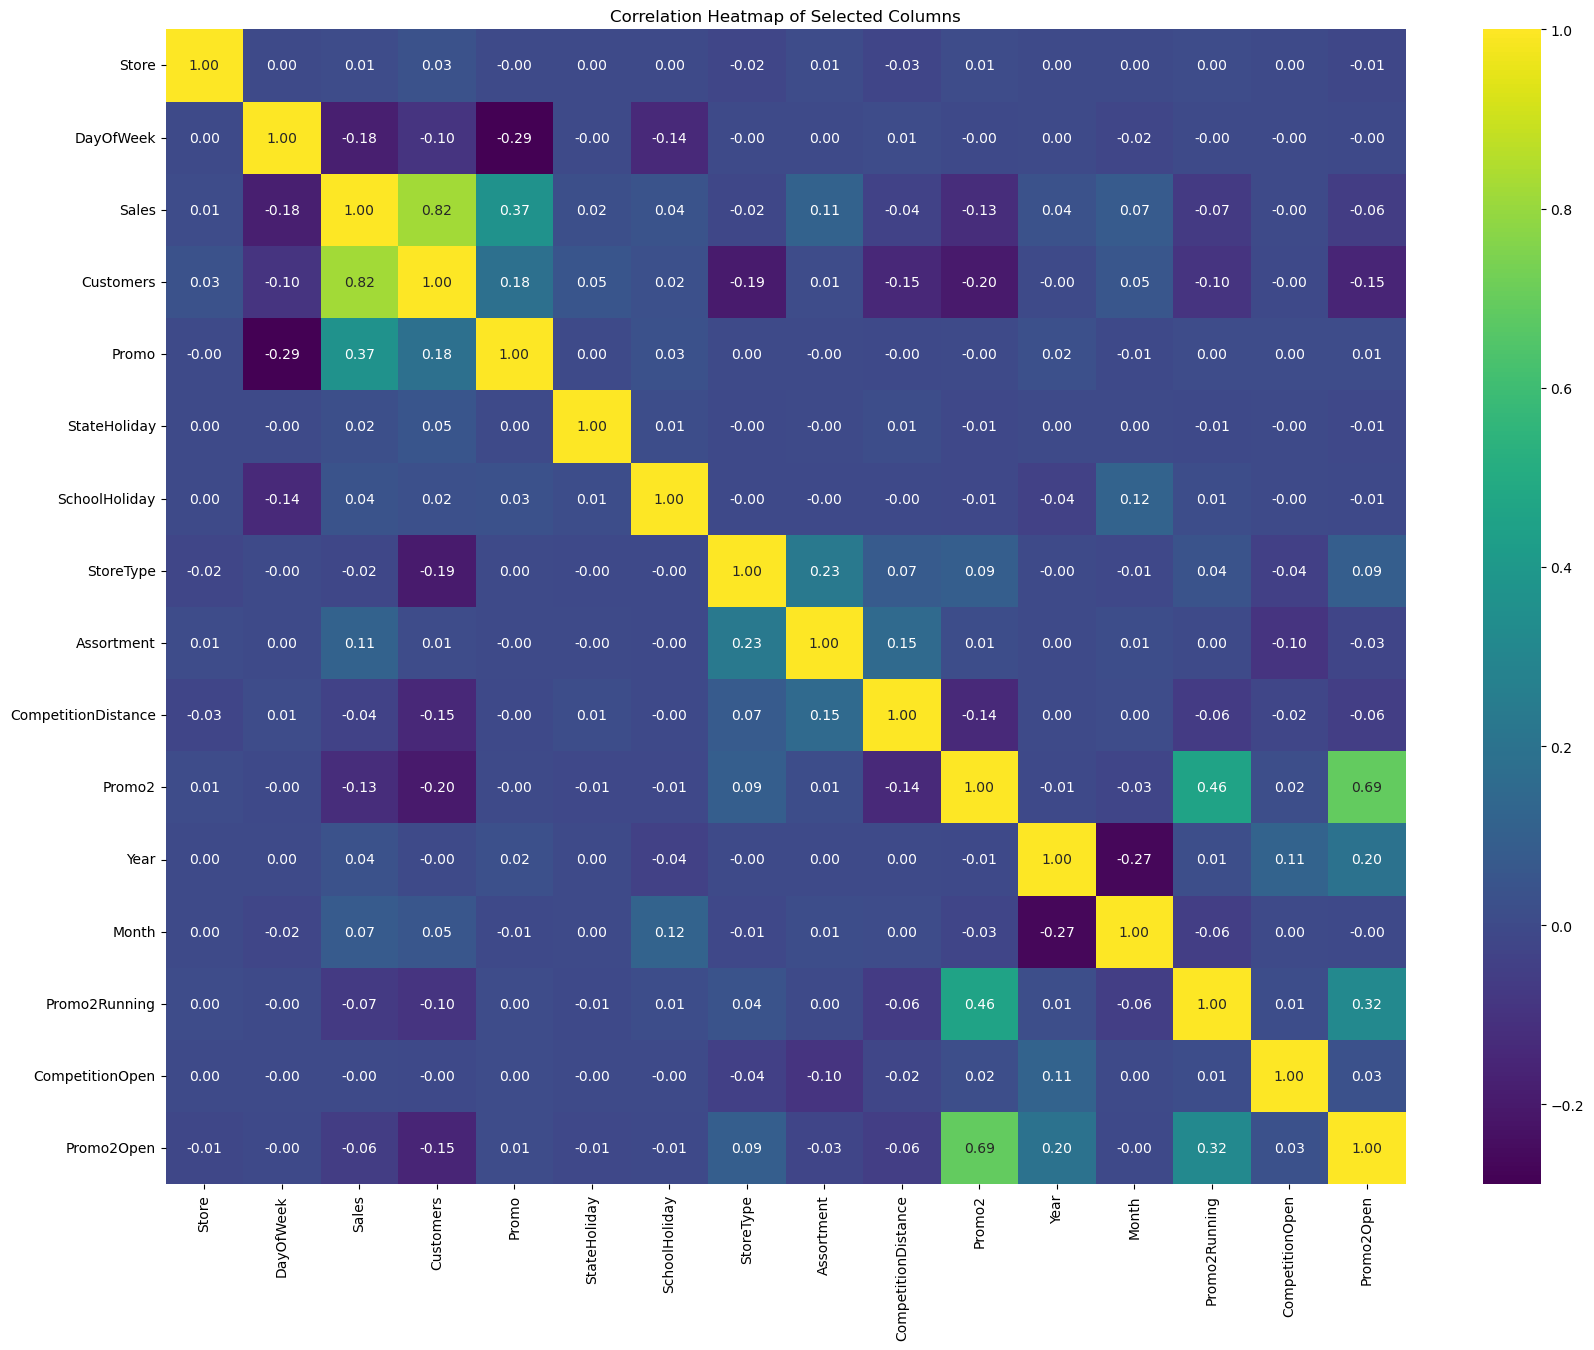

In [33]:
a = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
     'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
     'CompetitionDistance', 'Promo2', 'Year', 'Month',
     'Promo2Running', 'CompetitionOpen', 'Promo2Open']

subset_df = df1[a]

plt.figure(figsize=(20, 15))
sns.heatmap(subset_df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Selected Columns')
plt.savefig('correlation_heatmap.png')
plt.show()

In [24]:
# Set Date and Store column as index and sorting the df by year
df1 = df1.sort_values(by='Year', ascending=True).set_index(['Date','Store'])

In [25]:
df1

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 1097           2   5961       1405      0             1   
2013-08-31 359            6   7917        728      0             0   
           360            6   5619        632      0             0   
           361            6   5082        602      0             0   
           362            6  10394       1214      0             0   
...                     ...    ...        ...    ...           ...   
2015-03-11 239            3   4293        377      0             0   
           238            3   5983       1000      0             0   
           237            3   4669        597      0             0   
           246            3   5950        850      0             0   
2015-07-31 1              5   5263        555      1             0   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2013-01-01 1097               1          1           1                720.0   
2013-08-31 359                0          3           2               4370.0   
           360                0          0           0               2040.0   
           361                0          2           2               4490.0   
           362                0          2           2                340.0   
...                         ...        ...         ...                  ...   
2015-03-11 239                0          3           2                610.0   
           238                0          0           0                320.0   
           237                0          0           0               1420.0   
           246                1          2           0               4660.0   
2015-07-31 1                  1          2           0               1270.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  Promo2Running  \
Date       Store                                                              
2013-01-01 1097        0  2013      1           1          1              0   
2013-08-31 359         0  2013      8          35        243              0   
           360         0  2013      8          35        243              0   
           361         1  2013      8          35        243              1   
           362         0  2013      8          35        243              0   
...                  ...   ...    ...         ...        ...            ...   
2015-03-11 239         0  2015      3          11         70              0   
           238         1  2015      3          11         70              0   
           237         0  2015      3          11         70              0   
           246         0  2015      3          11         70              0   
2015-07-31 1           0  2015      7          31        212              0   

                  CompetitionOpen  Promo2Open  
Date       Store                               
2013-01-01 1097             130.0         0.0  
2013-08-31 359                0.0         0.0  
           360               74.0         0.0  
           361                0.0         7.0  
           362                0.0         0.0  
...                           ...         ...  
2015-03-11 239               18.0         0.0  
           238               18.0        64.0  
           237               88.0         0.0  
           246               23.0         0.0  
2015-07-31 1                 82.0         0.0  

[844392 rows x 17 columns]

####  Handling Outliers

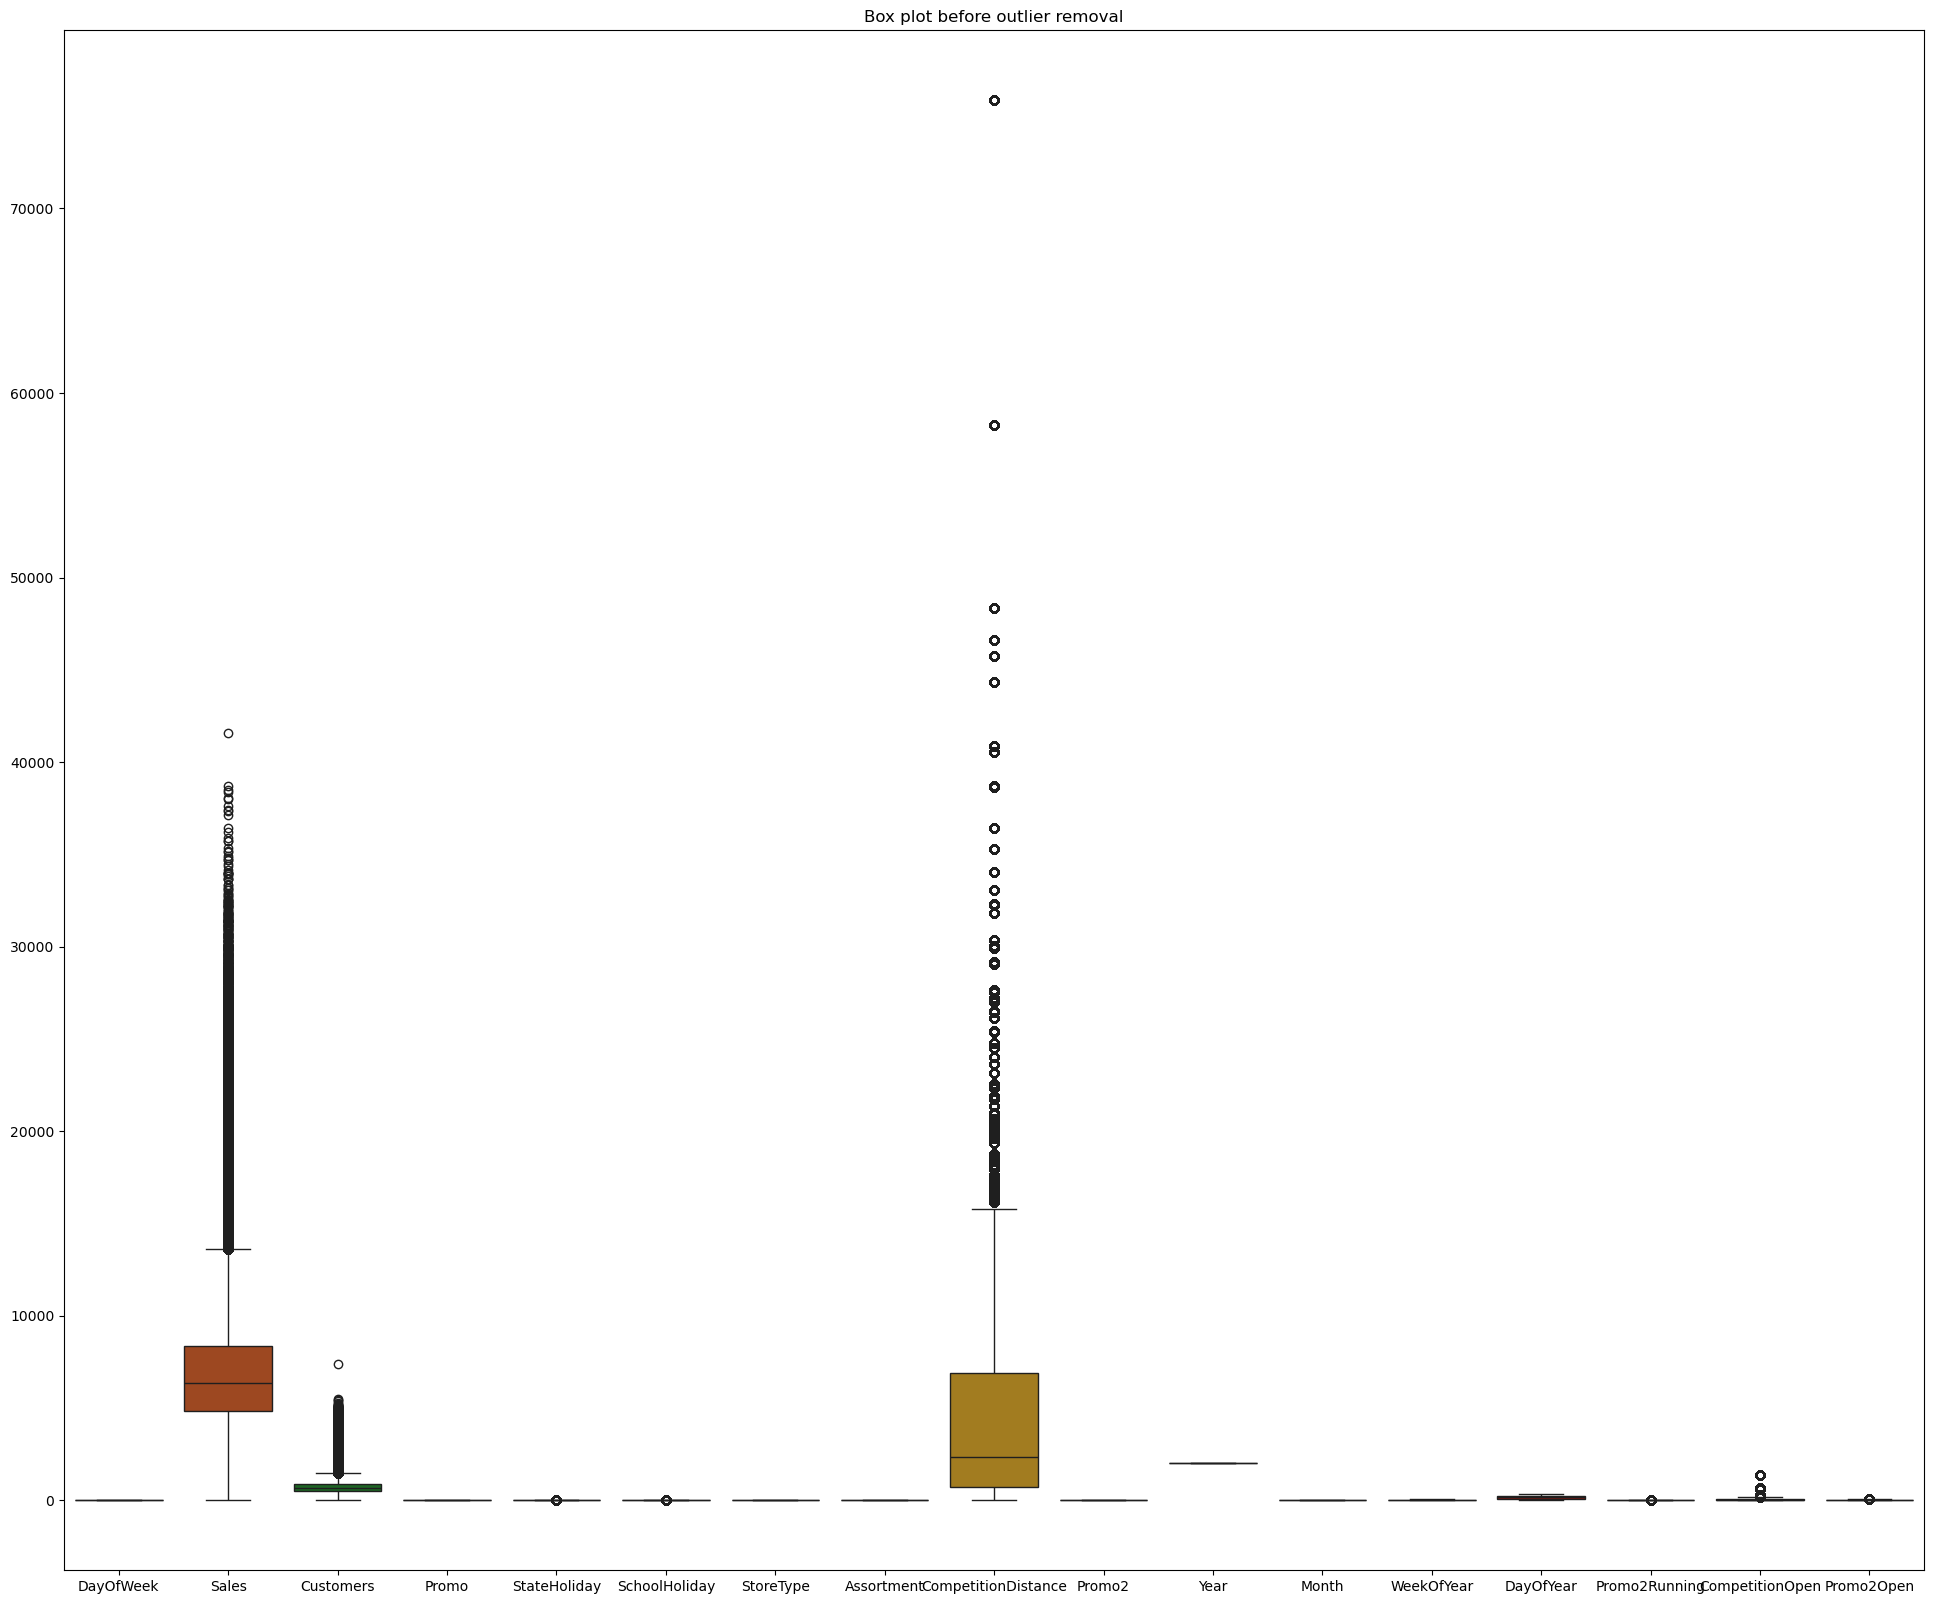

In [202]:
plt.figure(figsize=[24,20])
plt.title('Box plot before outlier removal')
sns.boxplot(df1,palette="dark")
plt.savefig('boxplotOutlierRemoved.png', format='png')
plt.show()

In [26]:
def remove_outliers_iqr(df, column_names):
    df_clean = df.copy()  

    for column in column_names:
        if pd.api.types.is_numeric_dtype(df_clean[column]):
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

    return df_clean

In [35]:
columns = ['DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
           'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2', 'Year', 'Month',
           'WeekOfYear', 'DayOfYear', 'Promo2Running', 'CompetitionOpen', 'Promo2Open']

df1 = remove_outliers_iqr(df1, columns)
df1

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-08-31 359            6   7917        728      0             0   
           360            6   5619        632      0             0   
           362            6  10394       1214      0             0   
           363            6   6733        922      0             0   
           358            6   9834       1122      0             0   
...                     ...    ...        ...    ...           ...   
2015-03-11 245            3   7824        986      0             0   
           241            3   5339        613      0             0   
           240            3   4419        442      0             0   
           239            3   4293        377      0             0   
           237            3   4669        597      0             0   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2013-08-31 359                0          3           2               4370.0   
           360                0          0           0               2040.0   
           362                0          2           2                340.0   
           363                0          0           0                250.0   
           358                0          0           0               2890.0   
...                         ...        ...         ...                  ...   
2015-03-11 245                0          0           2               1310.0   
           241                0          3           2                780.0   
           240                0          0           0               1110.0   
           239                0          3           2                610.0   
           237                0          0           0               1420.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  Promo2Running  \
Date       Store                                                              
2013-08-31 359         0  2013      8          35        243              0   
           360         0  2013      8          35        243              0   
           362         0  2013      8          35        243              0   
           363         0  2013      8          35        243              0   
           358         0  2013      8          35        243              0   
...                  ...   ...    ...         ...        ...            ...   
2015-03-11 245         0  2015      3          11         70              0   
           241         0  2015      3          11         70              0   
           240         0  2015      3          11         70              0   
           239         0  2015      3          11         70              0   
           237         0  2015      3          11         70              0   

                  CompetitionOpen  Promo2Open  
Date       Store                               
2013-08-31 359                0.0         0.0  
           360               74.0         0.0  
           362                0.0         0.0  
           363               47.0         0.0  
           358              118.0         0.0  
...                           ...         ...  
2015-03-11 245               18.0         0.0  
           241               18.0         0.0  
           240               70.0         0.0  
           239               18.0         0.0  
           237               88.0         0.0  

[211720 rows x 17 columns]

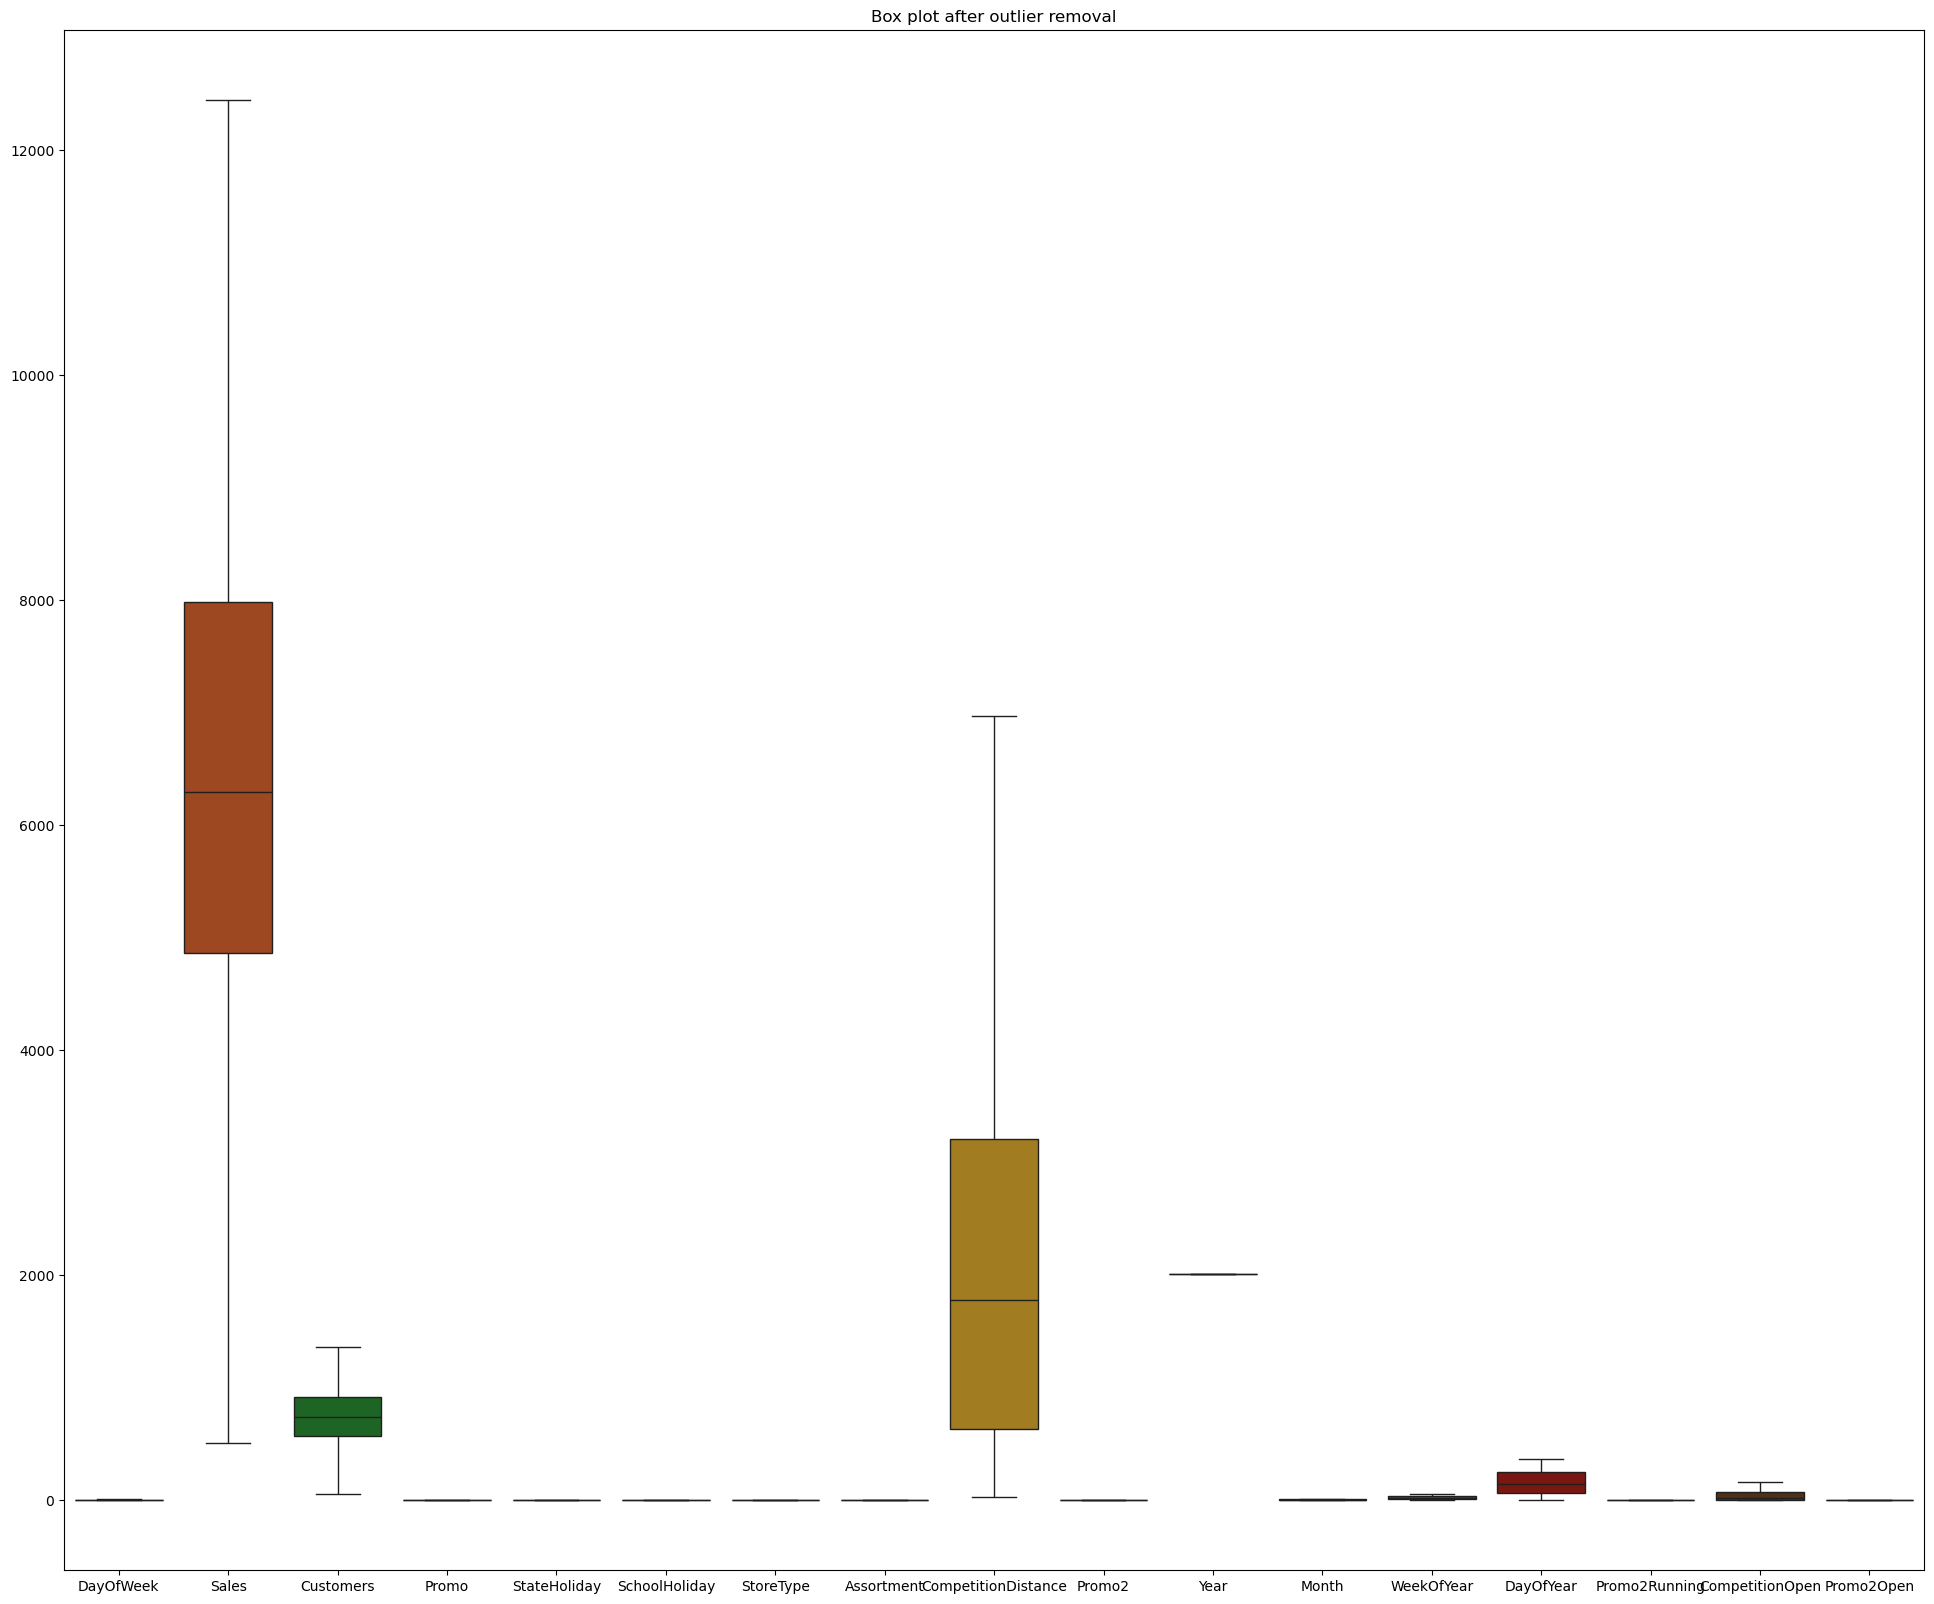

In [214]:
plt.figure(figsize=[24,20])
plt.title('Box plot after outlier removal')
sns.boxplot(df1,palette="dark")
plt.savefig('boxplotOutlierAfter.png', format='png')
plt.show()

In [36]:
df1.head()

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-08-31 359            6   7917        728      0             0   
           360            6   5619        632      0             0   
           362            6  10394       1214      0             0   
           363            6   6733        922      0             0   
           358            6   9834       1122      0             0   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2013-08-31 359                0          3           2               4370.0   
           360                0          0           0               2040.0   
           362                0          2           2                340.0   
           363                0          0           0                250.0   
           358                0          0           0               2890.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  Promo2Running  \
Date       Store                                                              
2013-08-31 359         0  2013      8          35        243              0   
           360         0  2013      8          35        243              0   
           362         0  2013      8          35        243              0   
           363         0  2013      8          35        243              0   
           358         0  2013      8          35        243              0   

                  CompetitionOpen  Promo2Open  
Date       Store                               
2013-08-31 359                0.0         0.0  
           360               74.0         0.0  
           362                0.0         0.0  
           363               47.0         0.0  
           358              118.0         0.0

In [37]:
df1.to_csv('Cleaned.csv')
